In [1]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('prducts.csv', index_col=0)

df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,NaN,\nNorth America\n,"114,689,887","+1,019","1,526,246",5.0,"108,543,269","+7,180","4,620,372","9,090",...,NaN,NaN,NaN,North America,\n,NaN,NaN,NaN,NaN,NaN
1,NaN,\nAsia\n,"184,944,461","+192,551","1,469,946",456.0,"176,895,095","+406,532","6,579,420","12,447",...,NaN,NaN,NaN,Asia,\n,NaN,NaN,NaN,NaN,NaN
2,NaN,\nEurope\n,"222,320,948","+64,173","1,905,046",252.0,"216,319,185","+163,962","4,096,717","9,098",...,NaN,NaN,NaN,Europe,\n,NaN,NaN,NaN,NaN,NaN
3,NaN,\nSouth America\n,"63,737,068","+4,031","1,326,180",30.0,"61,760,719","+11,246","650,169","10,505",...,NaN,NaN,NaN,South America,\n,NaN,NaN,NaN,NaN,NaN
4,NaN,\nOceania\n,"12,196,867","+10,421","19,642",15.0,"11,982,469","+1,697","194,756",144,...,NaN,NaN,NaN,Australia/Oceania,\n,NaN,NaN,NaN,NaN,NaN


In [3]:
df=df.drop(df.index[0:7])
df=df.drop(df.index[238:245])
df=df.drop(['#'],axis='columns')
df=df.drop(['Continent','1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M pop'], axis='columns')
df.reset_index(inplace=True, drop=True)
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,World,"610,506,373","+272,448","6,504,493",758.0,"587,445,506","+590,791","16,556,374","42,311","78,322",834.5,NaN,NaN,NaN
1,USA,"96,626,337",NaN,"1,072,946",NaN,"92,494,183",NaN,"3,059,208","3,713",NaN,NaN,"1,102,830,809",NaN,
2,India,"44,462,445",NaN,"528,007",NaN,"43,880,464",NaN,"53,974",698,"31,546",375,"887,379,274","629,589","1,409,458,588"
3,France,"34,596,180","+3,443","154,273",67.0,"34,086,130","+6,314","355,777",869,"527,486","2,352","271,490,188","4,139,392","65,586,967"
4,Brazil,"34,517,770",NaN,"684,427",NaN,"33,502,447",NaN,"330,896","8,318","159,923","3,171","63,776,166","295,480","215,839,289"


In [4]:
df.columns

Index(['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n',
       'Population'],
      dtype='object')

In [5]:
df.rename(columns={'Serious,Critical':'Serious','Country,Other':'Country'}, inplace=True)
df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,World,"610,506,373","+272,448","6,504,493",758.0,"587,445,506","+590,791","16,556,374","42,311","78,322",834.5,NaN,NaN,NaN
1,USA,"96,626,337",NaN,"1,072,946",NaN,"92,494,183",NaN,"3,059,208","3,713",NaN,NaN,"1,102,830,809",NaN,
2,India,"44,462,445",NaN,"528,007",NaN,"43,880,464",NaN,"53,974",698,"31,546",375,"887,379,274","629,589","1,409,458,588"
3,France,"34,596,180","+3,443","154,273",67.0,"34,086,130","+6,314","355,777",869,"527,486","2,352","271,490,188","4,139,392","65,586,967"
4,Brazil,"34,517,770",NaN,"684,427",NaN,"33,502,447",NaN,"330,896","8,318","159,923","3,171","63,776,166","295,480","215,839,289"


In [6]:
df.shape

(238, 14)

In [7]:
df.describe()

,NewDeaths
count,43.000000
mean,52.883721
std,137.963627
min,1.000000
25%,2.000000
50%,7.000000
75%,29.500000
max,758.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           238 non-null    object 
 1   TotalCases        238 non-null    object 
 2   NewCases          72 non-null     object 
 3   TotalDeaths       238 non-null    object 
 4   NewDeaths         43 non-null     float64
 5   TotalRecovered    220 non-null    object 
 6   NewRecovered      79 non-null     object 
 7   ActiveCases       221 non-null    object 
 8   Serious           158 non-null    object 
 9   Tot Cases/1M pop  228 non-null    object 
 10  Deaths/1M pop     223 non-null    object 
 11  TotalTests        214 non-null    object 
 12  Tests/
1M pop
    213 non-null    object 
 13  Population        230 non-null    object 
dtypes: float64(1), object(13)
memory usage: 26.2+ KB


In [9]:
df['NewCases']=df['NewCases'].str.replace('+','')
df['NewDeaths']=df['NewDeaths'].replace('+','')
df['NewRecovered']=df['NewRecovered'].str.replace('+','')


<ipython-input-9-a312cfc43960>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['NewCases']=df['NewCases'].str.replace('+','')
<ipython-input-9-a312cfc43960>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['NewRecovered']=df['NewRecovered'].str.replace('+','')


In [10]:
df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,World,"610,506,373","272,448","6,504,493",758.0,"587,445,506","590,791","16,556,374","42,311","78,322",834.5,NaN,NaN,NaN
1,USA,"96,626,337",NaN,"1,072,946",NaN,"92,494,183",NaN,"3,059,208","3,713",NaN,NaN,"1,102,830,809",NaN,
2,India,"44,462,445",NaN,"528,007",NaN,"43,880,464",NaN,"53,974",698,"31,546",375,"887,379,274","629,589","1,409,458,588"
3,France,"34,596,180","3,443","154,273",67.0,"34,086,130","6,314","355,777",869,"527,486","2,352","271,490,188","4,139,392","65,586,967"
4,Brazil,"34,517,770",NaN,"684,427",NaN,"33,502,447",NaN,"330,896","8,318","159,923","3,171","63,776,166","295,480","215,839,289"


In [11]:
for col in df.columns:
    df[col] =df[col].replace(',','')
df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,World,"610,506,373","272,448","6,504,493",758.0,"587,445,506","590,791","16,556,374","42,311","78,322",834.5,NaN,NaN,NaN
1,USA,"96,626,337",NaN,"1,072,946",NaN,"92,494,183",NaN,"3,059,208","3,713",NaN,NaN,"1,102,830,809",NaN,
2,India,"44,462,445",NaN,"528,007",NaN,"43,880,464",NaN,"53,974",698,"31,546",375,"887,379,274","629,589","1,409,458,588"
3,France,"34,596,180","3,443","154,273",67.0,"34,086,130","6,314","355,777",869,"527,486","2,352","271,490,188","4,139,392","65,586,967"
4,Brazil,"34,517,770",NaN,"684,427",NaN,"33,502,447",NaN,"330,896","8,318","159,923","3,171","63,776,166","295,480","215,839,289"


In [12]:
for col in df.columns[1:]:
    df[col] =pd.to_numeric(df[col], errors='coerce')
df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,World,NaN,NaN,NaN,758.0,NaN,NaN,NaN,NaN,NaN,834.5,NaN,NaN,NaN
1,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,698.0,NaN,375.0,NaN,NaN,NaN
3,France,NaN,NaN,NaN,67.0,NaN,NaN,NaN,869.0,NaN,NaN,NaN,NaN,NaN
4,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           238 non-null    object 
 1   TotalCases        10 non-null     float64
 2   NewCases          44 non-null     float64
 3   TotalDeaths       94 non-null     float64
 4   NewDeaths         43 non-null     float64
 5   TotalRecovered    10 non-null     float64
 6   NewRecovered      36 non-null     float64
 7   ActiveCases       94 non-null     float64
 8   Serious           142 non-null    float64
 9   Tot Cases/1M pop  9 non-null      float64
 10  Deaths/1M pop     125 non-null    float64
 11  TotalTests        0 non-null      float64
 12  Tests/
1M pop
    0 non-null      float64
 13  Population        1 non-null      float64
dtypes: float64(13), object(1)
memory usage: 26.2+ KB


In [14]:
d=df.drop(['Country'], axis='columns')
d.head()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,NaN,NaN,NaN,758.0,NaN,NaN,NaN,NaN,NaN,834.5,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,698.0,NaN,375.0,NaN,NaN,NaN
3,NaN,NaN,NaN,67.0,NaN,NaN,NaN,869.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


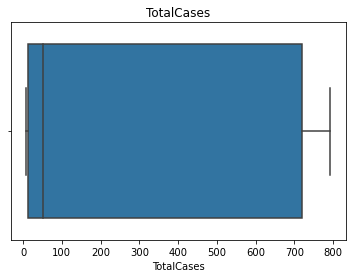

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


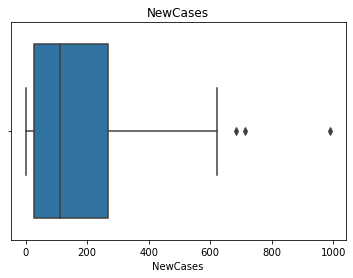

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


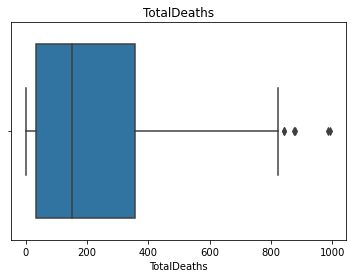

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


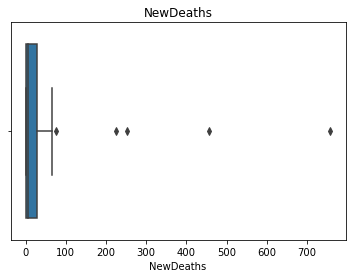

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


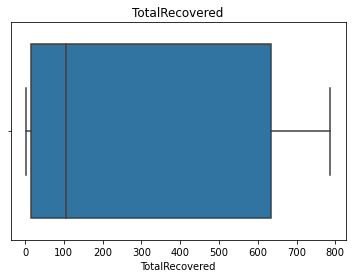

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


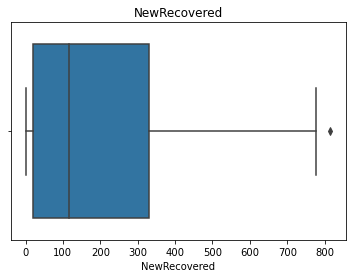

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


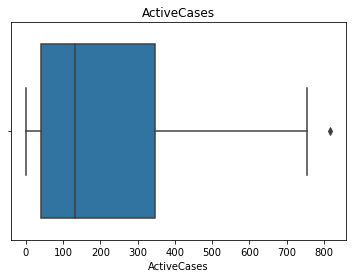

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


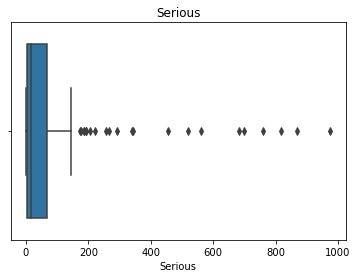

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


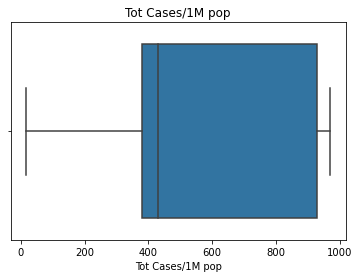

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


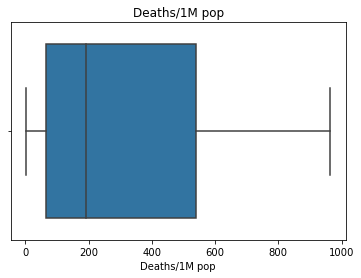

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


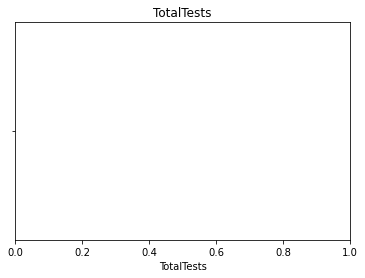

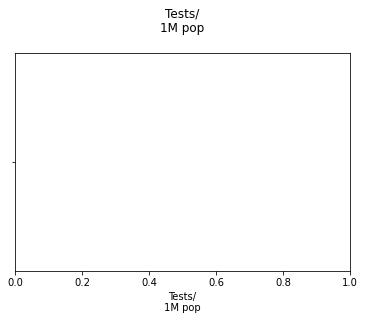

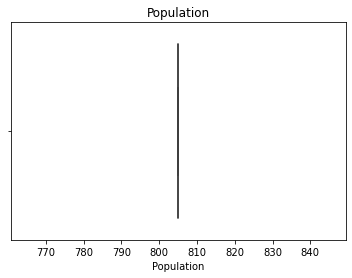

In [15]:
for i in d:
    sns.boxplot(d[i])
    plt.title(i)
    plt.show()
    

In [16]:
df.isnull().sum()

Country               0
TotalCases          228
NewCases            194
TotalDeaths         144
NewDeaths           195
TotalRecovered      228
NewRecovered        202
ActiveCases         144
Serious              96
Tot Cases/1M pop    229
Deaths/1M pop       113
TotalTests          238
Tests/\n1M pop\n    238
Population          237
dtype: int64

In [17]:
df=df.fillna(0)
df.isnull().sum()

Country             0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious             0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/\n1M pop\n    0
Population          0
dtype: int64

In [18]:
pd.pivot_table(df, index='Country', values=['TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases','Serious','Deaths/1M pop','TotalTests','Tests/\n1M pop\n','Population'])

,ActiveCases,Deaths/1M pop,NewCases,NewDeaths,NewRecovered,Population,Serious,Tests/\n1M pop\n,TotalCases,TotalDeaths,TotalRecovered,TotalTests
Country,,,,,,,,,,,,
Afghanistan,0.0,191.0,121.0,1.0,229.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,28.0,0.0,228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,151.0,18.0,0.0,21.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
Andorra,82.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,154.0,0.0,0.0
Angola,282.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,9.0,0.0
World,0.0,834.5,0.0,758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,657.0,69.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

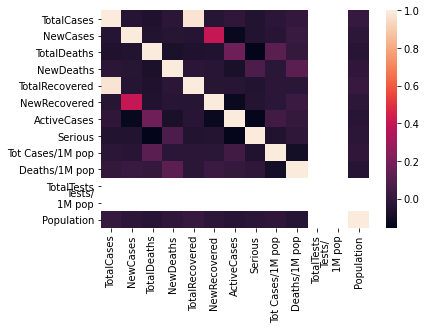

In [19]:
cor=df.select_dtypes(py.number).corr()
sns.heatmap(cor)

In [20]:
z=pd.pivot_table(df, index='Country', values=['TotalCases']).sort_values(by='TotalCases', ascending=False).round()
z.head()

,TotalCases
Country,
Macao,793.0
Wallis and Futuna,761.0
Diamond Princess,712.0
Total:,103.0
Niue,73.0


In [21]:
z=pd.pivot_table(df, index='Country', values=['NewCases']).sort_values(by='NewCases', ascending=False).round()
z.head()

,NewCases
Country,
Mexico,990.0
Portugal,713.0
Qatar,683.0
Azerbaijan,621.0
Kazakhstan,562.0


In [22]:
z=pd.pivot_table(df, index='Country', values=['TotalDeaths']).sort_values(by='TotalDeaths', ascending=False).round()
z.head()

,TotalDeaths
Country,
Mauritania,993.0
Guadeloupe,986.0
Fiji,878.0
Réunion,874.0
Haiti,841.0


In [23]:
z=pd.pivot_table(df, index='Country', values=['ActiveCases']).sort_values(by='ActiveCases', ascending=False).round()
z.head()

,ActiveCases
Country,
Barbados,817.0
Burundi,754.0
Niger,752.0
Tonga,750.0
Kiribati,714.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalTests', ylabel='TotalCases'>

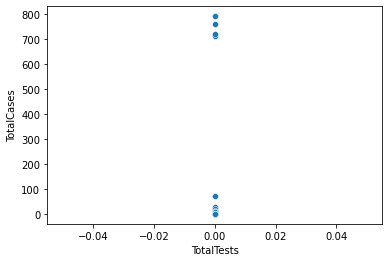

In [24]:
sns.scatterplot(df.TotalTests,df.TotalCases)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NewCases', ylabel='TotalTests'>

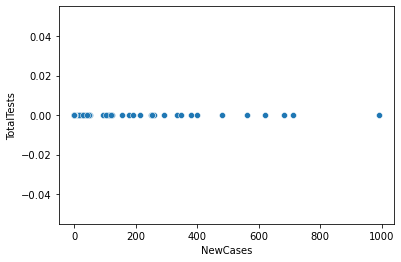

In [25]:
sns.scatterplot(df.NewCases,df.TotalTests)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalTests', ylabel='NewCases'>

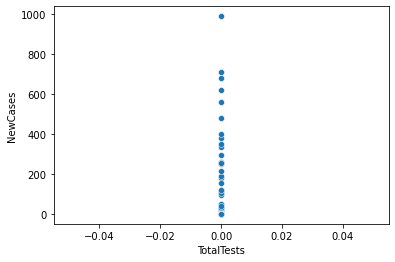

In [26]:
sns.scatterplot(df.TotalTests,df.NewCases)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalRecovered', ylabel='TotalCases'>

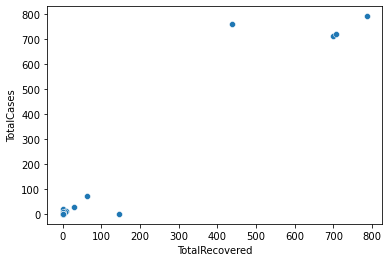

In [27]:
sns.scatterplot(df.TotalRecovered,df.TotalCases)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalDeaths', ylabel='TotalCases'>

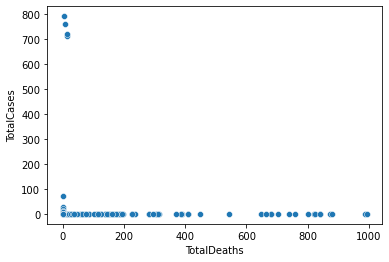

In [28]:
sns.scatterplot(df.TotalDeaths,df.TotalCases)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ActiveCases', ylabel='TotalCases'>

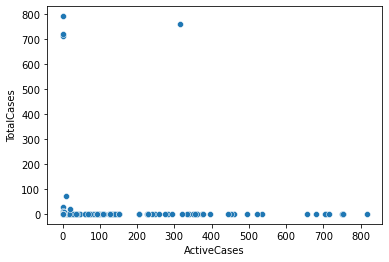

In [29]:
sns.scatterplot(df.ActiveCases ,df.TotalCases)